## Kaggle Competition:
### House Prices Advanced Regression Techniques
#### Plan of action
1. Explore The Data set (Shape, Type of variable)
2. Segrigate the Numerical fetures and Categorical features
3. check for Missing Values 
4. Fill the missing value (Numerical and Categorical)
5. Transform the Categorical feature.
6. Check the distribution of the features
7. Scale the features

#### Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
numeric = train.select_dtypes(include = np.number)

In [8]:
test_numeric = test.select_dtypes(include = np.number)

In [9]:
numeric.shape

(1460, 38)

In [10]:
test_numeric.shape

(1459, 37)

In [11]:
categorical = train.select_dtypes(include = 'object')

In [12]:
test_cat = test.select_dtypes(include = 'object')

In [13]:
test_cat.shape

(1459, 43)

In [14]:
categorical.shape

(1460, 43)

#### Dataset Has 81 Features 
* It has 38 Numerical Feature and 43 Categorical Feature

#### Missing Value

In [15]:
numeric_nan = [i for i in numeric.columns if numeric[i].isnull().sum()>0]

In [16]:
test_numeric_nan = [i for i in test_numeric.columns if test_numeric[i].isnull().sum()>0]

In [17]:
categorical_nan = [i for i in categorical.columns if categorical[i].isnull().sum()>0]

In [18]:
test_categorical_nan = [i for i in test_cat.columns if test_cat[i].isnull().sum()>0]

In [19]:
numeric[numeric_nan].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [20]:
test_numeric[test_numeric_nan].isnull().sum()

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [21]:
test[numeric_nan].isnull().sum()

LotFrontage    227
MasVnrArea      15
GarageYrBlt     78
dtype: int64

#### 

#### Approach to Fill Missing Value in Numerical Features
1. will Create new columns for feature which has missing value
     * fill those column with 1 and 0. (place 1 where value is missing in orignal column )
2. will fill the missing value in orignal features with median

In [22]:
for i in numeric_nan:
    numeric[i+'_nan'] = np.where(numeric[i].isnull(),1,0) # Creating the nan columns 
    test_numeric[i+'_nan'] = np.where(test_numeric[i].isnull(),1,0)
    numeric[i] = numeric[i].fillna(numeric[i].median()) # Filling the missing value with median.
    test_numeric[i] = test_numeric[i].fillna(test_numeric[i].median())

C:\Users\rishi\AppData\Local\Temp/ipykernel_1692/339077483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric[i+'_nan'] = np.where(numeric[i].isnull(),1,0)
C:\Users\rishi\AppData\Local\Temp/ipykernel_1692/339077483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_numeric[i+'_nan'] = np.where(test_numeric[i].isnull(),1,0)
C:\Users\rishi\AppData\Local\Temp/ipykernel_1692/339077483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [23]:
numeric[numeric_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [24]:
test_numeric[test_numeric_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
GarageYrBlt     0
GarageCars      1
GarageArea      1
dtype: int64

In [25]:
for i in test_numeric_nan:
    test_numeric[i] = test_numeric[i].fillna(test_numeric[i].median())

C:\Users\rishi\AppData\Local\Temp/ipykernel_1692/2580562191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_numeric[i] = test_numeric[i].fillna(test_numeric[i].median())


In [26]:
test_numeric[test_numeric_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [27]:
numeric.shape

(1460, 41)

In [28]:
test_numeric.shape

(1459, 40)

#### Filling missing value in Categorical Feature
* Will fill all the nan value with 'Missing'

In [29]:
for i in categorical_nan:
    categorical[i] = categorical[i].fillna('Missing')

C:\Users\rishi\AppData\Local\Temp/ipykernel_1692/892309385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = categorical[i].fillna('Missing')


In [30]:
for i in test_categorical_nan:
    test_cat[i] = test_cat[i].fillna('Missing')

C:\Users\rishi\AppData\Local\Temp/ipykernel_1692/3234409701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cat[i] = test_cat[i].fillna('Missing')


In [31]:
print(categorical.shape)
print(test_cat.shape)

(1460, 43)
(1459, 43)


In [32]:
categorical['y'] = train.SalePrice.copy()
test_cat['y'] = train.SalePrice.copy()

C:\Users\rishi\AppData\Local\Temp/ipykernel_1692/1150878971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['y'] = train.SalePrice.copy()
C:\Users\rishi\AppData\Local\Temp/ipykernel_1692/1150878971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cat['y'] = train.SalePrice.copy()


In [33]:
for i in categorical.columns:
    print(categorical[i].value_counts())
    

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Missing    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2


#### Transform The categorical feature
###### Will do Traget Guided Ordinal Encoding
    1 Will groupby every feature with respect to mean Sale Price
    2 will sort the value in ascending order
    3 will take the index (class names)
    4 will numrate the class names with the ranked number

In [34]:
for i in categorical.columns:
    label_order = categorical.groupby([i])['y'].mean().sort_values().index
    label_order = {k:i for i, k in enumerate(label_order, 0)}
    categorical[i] = categorical[i].map(label_order)
    test_cat[i] = test_cat[i].map(label_order)

C:\Users\rishi\AppData\Local\Temp/ipykernel_1692/18424699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = categorical[i].map(label_order)
C:\Users\rishi\AppData\Local\Temp/ipykernel_1692/18424699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cat[i] = test_cat[i].map(label_order)


In [35]:
categorical.head()

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0         3       1      2         0            1          1          0   
1         3       1      2         0            1          1          1   
2         3       1      2         1            1          1          0   
3         3       1      2         1            1          1          2   
4         3       1      2         1            1          1          1   

   LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
0          0            16           4           4         4           6   
1          0            20           2           4         4           5   
2          0            16           4           4         4           6   
3          0            17           4           4         4           6   
4          0            24           4           4         4           6   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  \
0          1         2           11           12           2          2   
1          1         2            4            5           1          1   
2          1         2           11           12           2          2   
3          1         2            5            8           1          1   
4          1         2           11           12           2          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3           5         3         3             1             6   
1          3           2         3         3             4             4   
2          3           5         3         3             2             6   
3          3           1         2         4             1             4   
4          3           5         3         3             3             6   

   BsmtFinType2  Heating  HeatingQC  CentralAir  Electrical  KitchenQual  \
0             5        5          4           1           5            2   
1             5        5          4           1           5            1   
2             5        5          4           1           5            2   
3             5        5          3           1           5            2   
4             5        5          4           1           5            2   

   Functional  FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  \
0           6            1           5             2           3           5   
1           6            3           5             2           3           5   
2           6            3           5             2           3           5   
3           6            4           2             1           3           5   
4           6            3           5             2           3           5   

   PavedDrive  PoolQC  Fence  MiscFeature  SaleType  SaleCondition    y  
0           2       0      4            3         4              4  412  
1           2       0      4            3         4              4  339  
2           2       0      4            3         4              4  442  
3           2       0      4            3         4              1  194  
4           2       0      4            3         4              4  494

In [36]:
test_cat.head()

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0       2.0       1      2         0            1        1.0          0   
1       3.0       1      2         1            1        1.0          2   
2       3.0       1      2         1            1        1.0          0   
3       3.0       1      2         1            1        1.0          0   
4       3.0       1      2         1            3        1.0          0   

   LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
0          0            10           2           4         4           5   
1          0            10           4           4         4           5   
2          0            14           4           4         4           6   
3          0            14           4           4         4           6   
4          0            22           4           4         3           5   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  \
0          1         2         11.0         12.0           1          1   
1          4         2          5.0          4.0           2          1   
2          1         2         11.0         12.0           1          1   
3          1         2         11.0         12.0           2          1   
4          1         2          8.0          9.0           1          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3           2         2         3             1             1   
1          3           2         2         3             1             4   
2          3           5         3         3             1             6   
3          3           5         2         3             1             6   
4          3           5         3         3             1             4   

   BsmtFinType2  Heating  HeatingQC  CentralAir  Electrical  KitchenQual  \
0             2        5          2           1           5          1.0   
1             5        5          2           1           5          2.0   
2             5        5          3           1           5          1.0   
3             5        5          4           1           5          2.0   
4             5        5          4           1           5          2.0   

   Functional  FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  \
0         6.0            1           5             1           3           5   
1         6.0            1           5             1           3           5   
2         6.0            3           5             3           3           5   
3         6.0            4           5             3           3           5   
4         6.0            1           5             2           3           5   

   PavedDrive  PoolQC  Fence  MiscFeature  SaleType  SaleCondition    y  
0           2       0      2            3       4.0              4  412  
1           2       0      4            2       4.0              4  339  
2           2       0      2            3       4.0              4  442  
3           2       0      4            3       4.0              4  194  
4           2       0      4            3       4.0              4  494

In [37]:
test_cat.isnull().sum()

MSZoning         4
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      1
Functional       2
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         1
SaleCondition    0
y                0
dtype: int64

In [38]:
test_cat_null = [i for i in test_cat.columns if test_cat[i].isnull().sum()>0]

In [39]:
for i in test_cat_null:
    test_cat[i] = test_cat[i].fillna(test_cat[i].median())

C:\Users\rishi\AppData\Local\Temp/ipykernel_1692/1939183029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cat[i] = test_cat[i].fillna(test_cat[i].median())


In [40]:
test_cat[test_cat_null].isnull().sum()

MSZoning       0
Utilities      0
Exterior1st    0
Exterior2nd    0
KitchenQual    0
Functional     0
SaleType       0
dtype: int64

In [41]:
numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  LotFrontage_nan  MasVnrArea_nan  GarageYrBlt_nan  
0     208500                0               0                0  
1     181500                0               0                0  
2     223500                0               0                0  
3     140000                0               0                0  
4     250000                0               0                0

In [42]:
test_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   
2  1463          60         74.0    13830            5            5   
3  1464          60         78.0     9978            6            6   
4  1465         120         43.0     5005            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0       1961          1961         0.0       468.0       144.0      270.0   
1       1958          1958       108.0       923.0         0.0      406.0   
2       1997          1998         0.0       791.0         0.0      137.0   
3       1998          1998        20.0       602.0         0.0      324.0   
4       1992          1992         0.0       263.0         0.0     1017.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        882.0       896         0             0        896           0.0   
1       1329.0      1329         0             0       1329           0.0   
2        928.0       928       701             0       1629           0.0   
3        926.0       926       678             0       1604           0.0   
4       1280.0      1280         0             0       1280           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0           0.0         1         0             2             1             5   
1           0.0         1         1             3             1             6   
2           0.0         2         1             3             1             6   
3           0.0         2         1             3             1             7   
4           0.0         2         0             2             1             5   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0       1961.0         1.0       730.0         140            0   
1           0       1958.0         1.0       312.0         393           36   
2           1       1997.0         2.0       482.0         212           34   
3           1       1998.0         2.0       470.0         360           36   
4           0       1992.0         2.0       506.0           0           82   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0          120         0        0       6    2010   
1              0          0            0         0    12500       6    2010   
2              0          0            0         0        0       3    2010   
3              0          0            0         0        0       6    2010   
4              0          0          144         0        0       1    2010   

   LotFrontage_nan  MasVnrArea_nan  GarageYrBlt_nan  
0                0               0                0  
1                0               0                0  
2                0               0                0  
3                0               0                0  
4                0               0                0

In [43]:
categorical.drop('y', axis=1, inplace = True)
test_cat.drop('y', axis = 1, inplace = True)

C:\Users\rishi\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
x = train.copy()
y = train.SalePrice.copy()

In [45]:
x[numeric.columns] = numeric.copy()
x[categorical.columns] = categorical.copy()

In [46]:
x.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      2         0   
1   2          20         3         80.0     9600       1      2         0   
2   3          60         3         68.0    11250       1      2         1   
3   4          70         3         60.0     9550       1      2         1   
4   5          60         3         84.0    14260       1      2         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            16           4   
1            1          1          1          0            20           2   
2            1          1          0          0            16           4   
3            1          1          2          0            17           4   
4            1          1          1          0            24           4   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           4         4           6            7            5       2003   
1           4         4           5            6            8       1976   
2           4         4           6            7            5       2001   
3           4         4           6            7            5       1915   
4           4         4           6            8            5       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         2           11           12           2   
1          1976          1         2            4            5           1   
2          2002          1         2           11           12           2   
3          1970          1         2            5            8           1   
4          2000          1         2           11           12           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          3           5         3         3   
1         0.0          1          3           2         3         3   
2       162.0          2          3           5         3         3   
3         0.0          1          3           1         2         4   
4       350.0          2          3           5         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6         706             5           0   
1             4             4         978             5           0   
2             2             6         486             5           0   
3             1             4         216             5           0   
4             3             6         655             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        5          4           1           5   
1        284         1262        5          4           1           5   
2        434          920        5          4           1           5   
3        540          756        5          3           1           5   
4        490         1145        5          4           1           5   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            1             6   
2         2         1             3             1            2             6   
3         1         0             3             1            2 

In [47]:
test[test_numeric.columns] = test_numeric.copy()
test[test_cat.columns] = test_cat.copy()

In [ ]:
x.to_csv('ft_train.csv', index = False)

In [48]:
test.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  1461          20       2.0         80.0    11622       1      2         0   
1  1462          20       3.0         81.0    14267       1      2         1   
2  1463          60       3.0         74.0    13830       1      2         1   
3  1464          60       3.0         78.0     9978       1      2         1   
4  1465         120       3.0         43.0     5005       1      2         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1        1.0          0          0            10           2   
1            1        1.0          2          0            10           4   
2            1        1.0          0          0            14           4   
3            1        1.0          0          0            14           4   
4            3        1.0          0          0            22           4   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           4         4           5            5            6       1961   
1           4         4           5            6            6       1958   
2           4         4           6            5            5       1997   
3           4         4           6            6            6       1998   
4           4         3           5            8            5       1992   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          1961          1         2         11.0         12.0           1   
1          1958          4         2          5.0          4.0           2   
2          1998          1         2         11.0         12.0           1   
3          1998          1         2         11.0         12.0           2   
4          1992          1         2          8.0          9.0           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          1          3           2         2         3   
1       108.0          1          3           2         2         3   
2         0.0          1          3           5         3         3   
3        20.0          1          3           5         2         3   
4         0.0          2          3           5         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             1       468.0             2       144.0   
1             1             4       923.0             5         0.0   
2             1             6       791.0             5         0.0   
3             1             6       602.0             5         0.0   
4             1             4       263.0             5         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      270.0        882.0        5          2           1           5   
1      406.0       1329.0        5          2           1           5   
2      137.0        928.0        5          3           1           5   
3      324.0        926.0        5          4           1           5   
4     1017.0       1280.0        5          4           1           5   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       896         0             0        896           0.0           0.0   
1      1329         0             0       1329           0.0           0.0   
2       928       701             0       1629           0.0           0.0   
3       926       678             0       1604           0.0           0.0   
4      1280         0             0       1280           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1         0             2             1          1.0             5   
1         1         1             3             1          2.0             6   
2         2         1             3             1          1.0             6   
3         2         1             3             1    

#### Distribution of Data

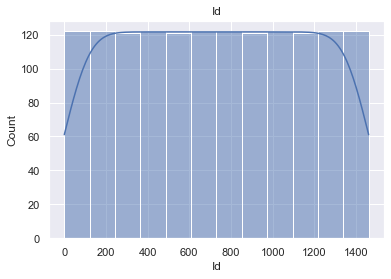

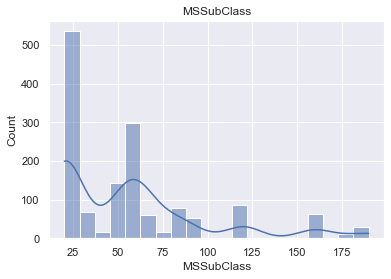

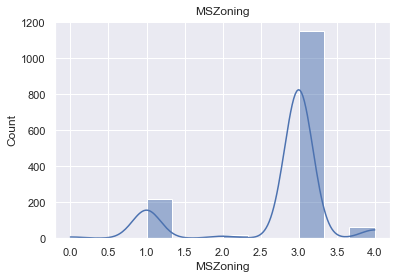

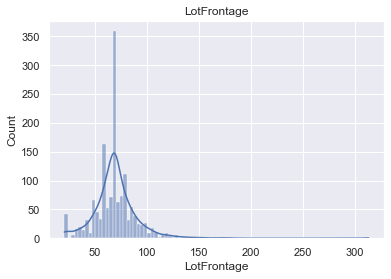

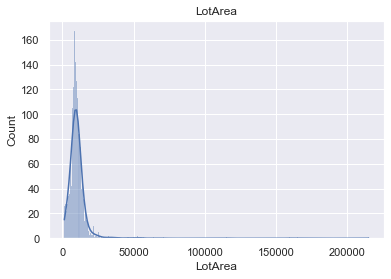

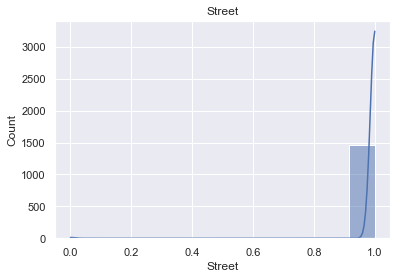

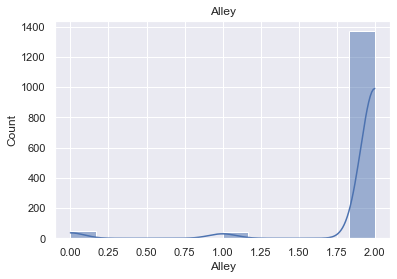

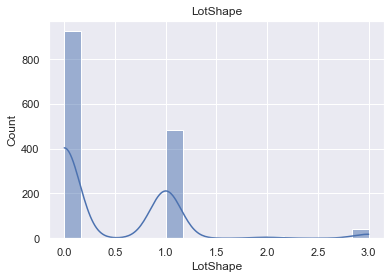

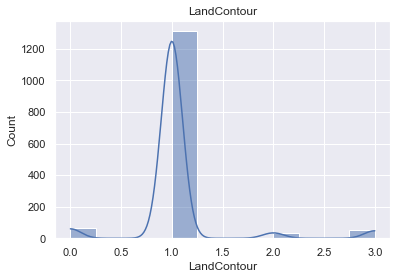

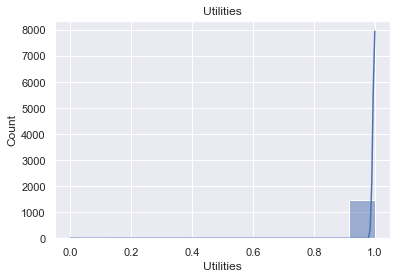

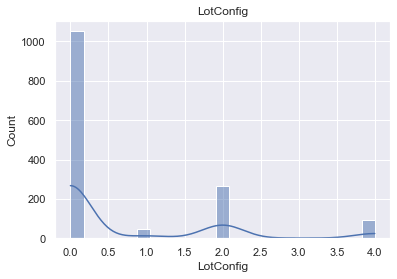

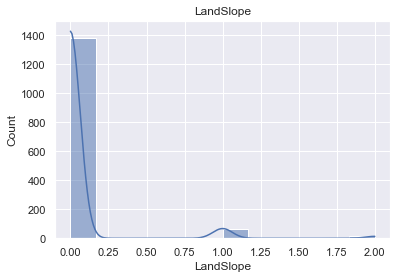

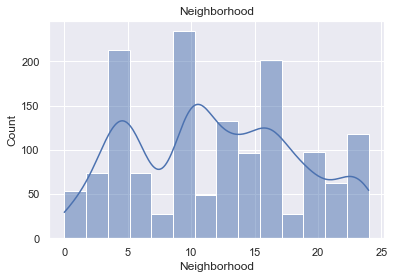

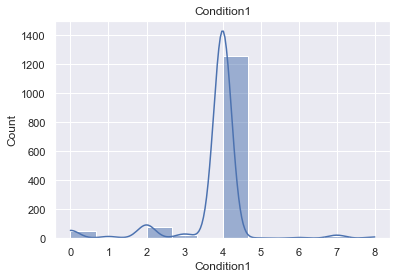

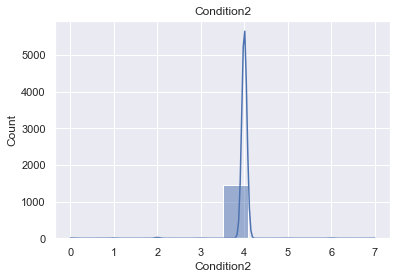

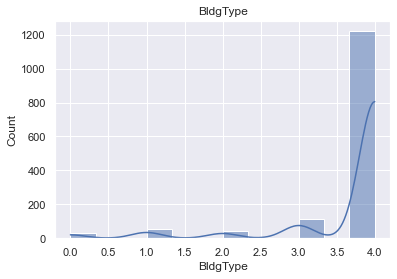

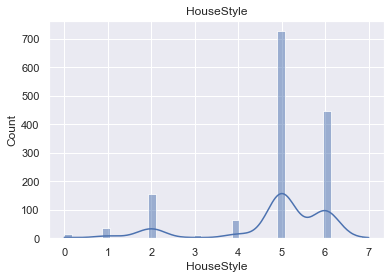

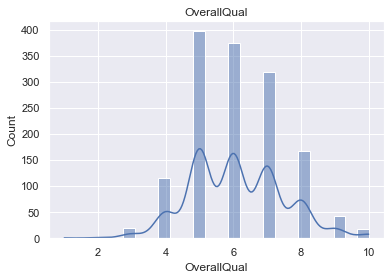

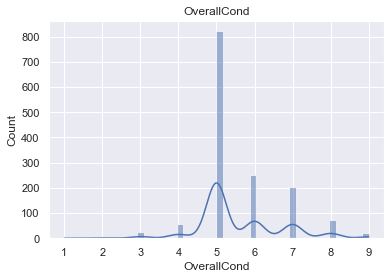

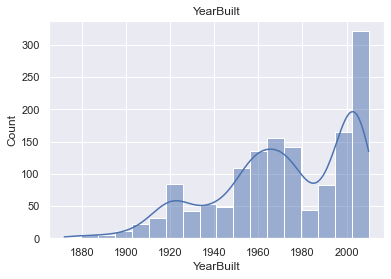

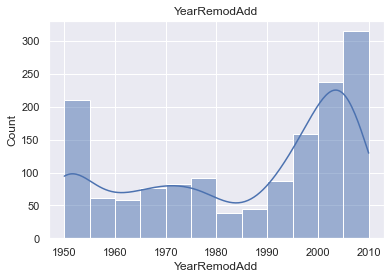

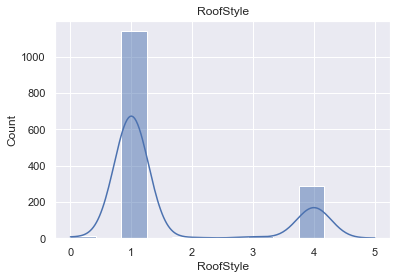

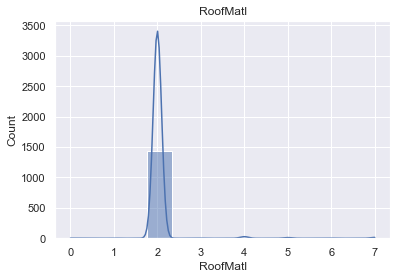

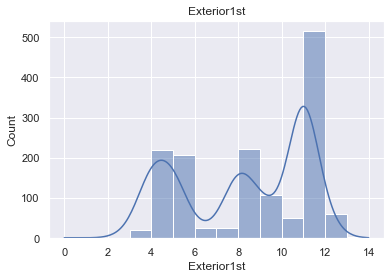

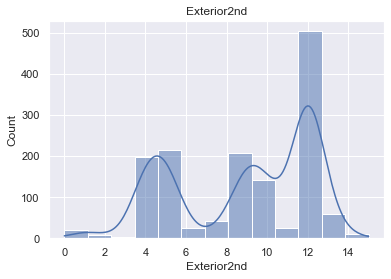

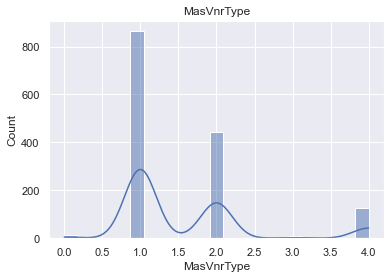

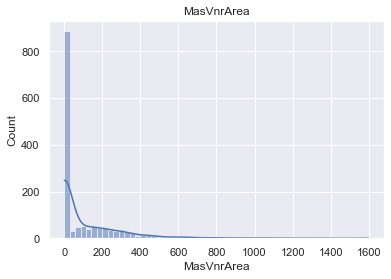

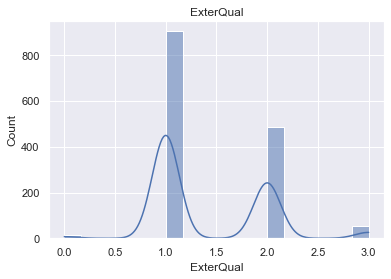

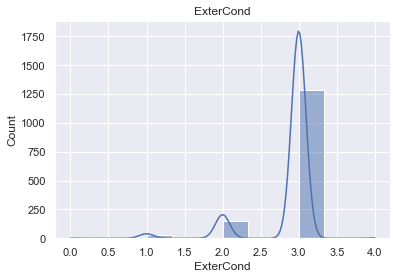

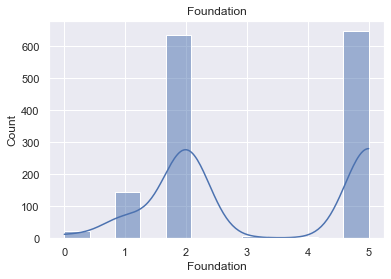

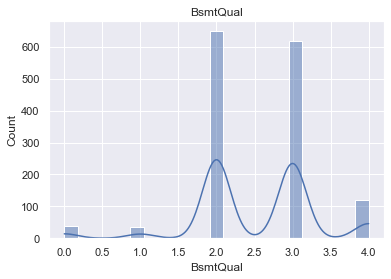

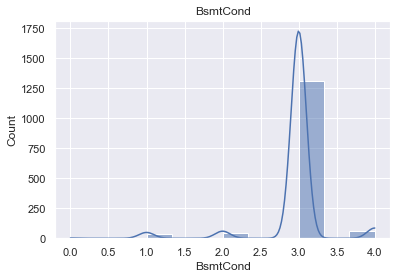

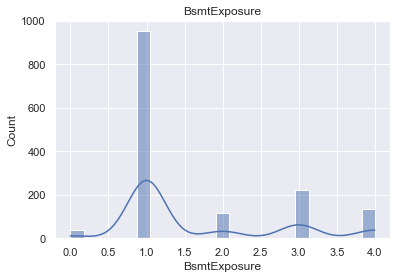

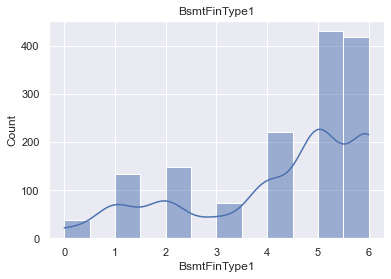

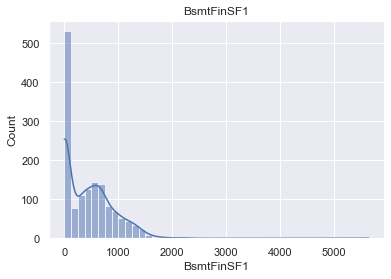

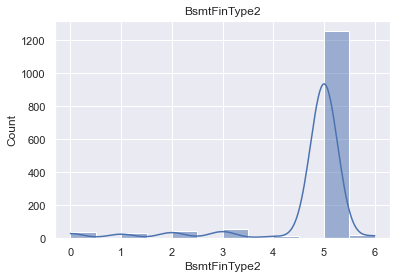

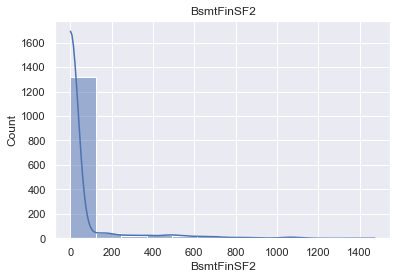

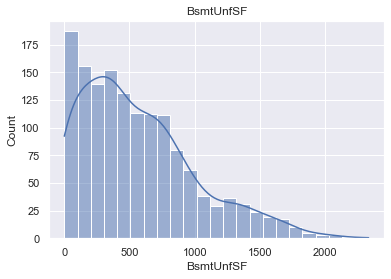

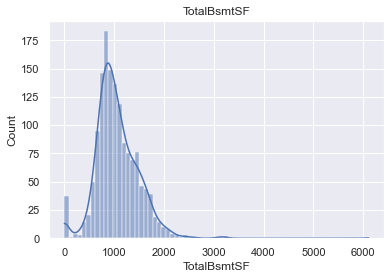

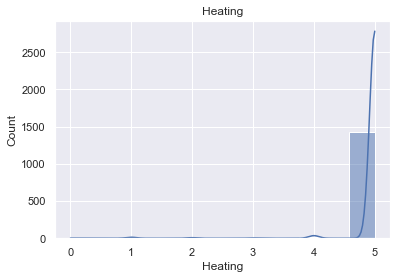

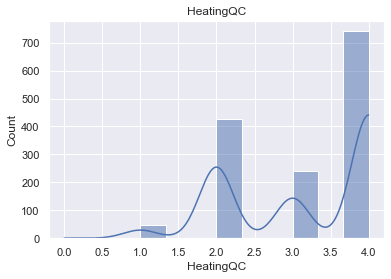

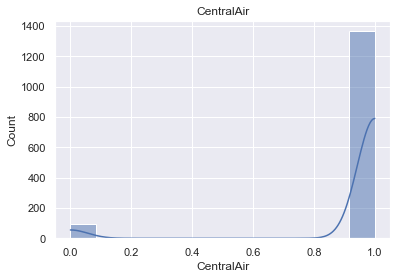

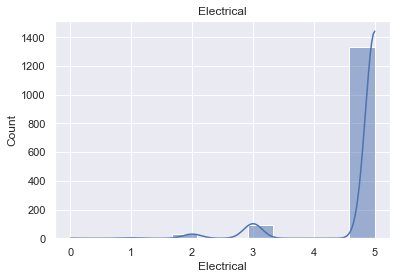

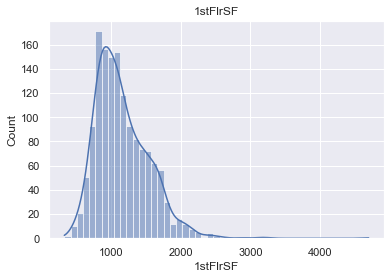

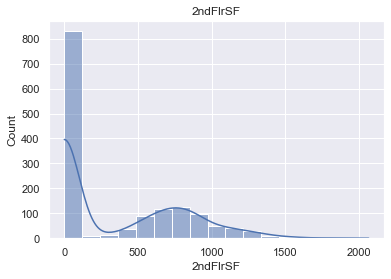

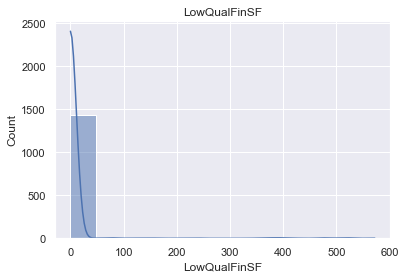

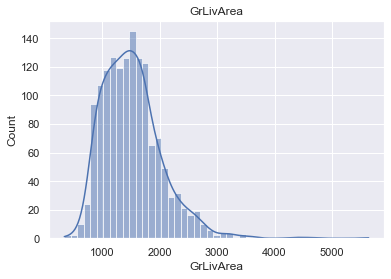

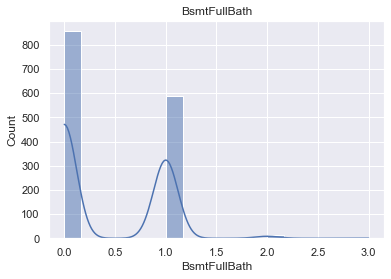

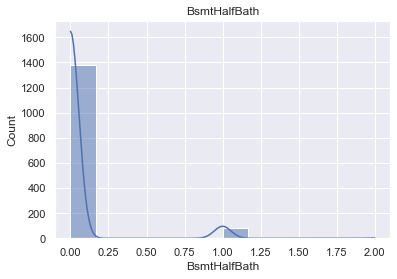

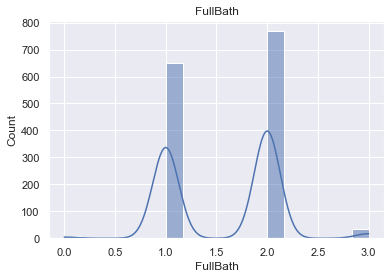

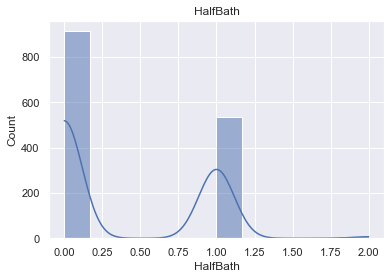

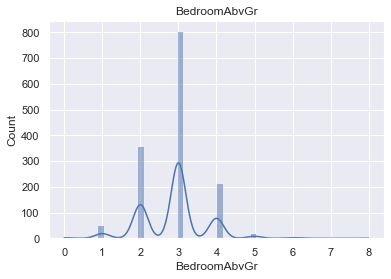

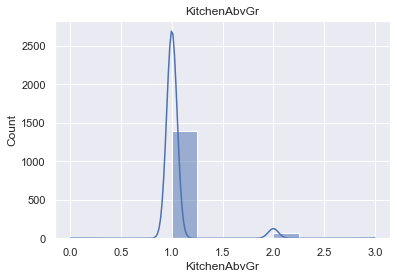

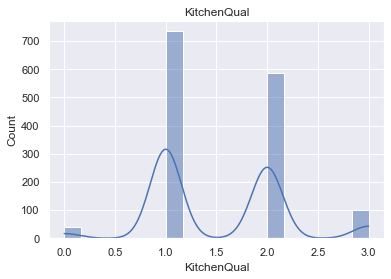

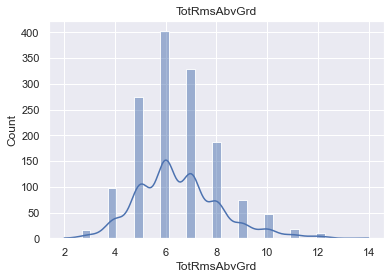

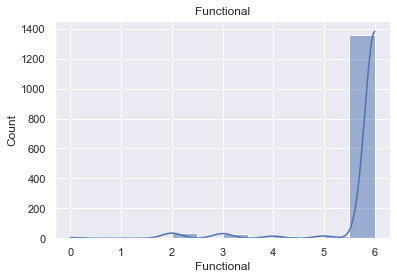

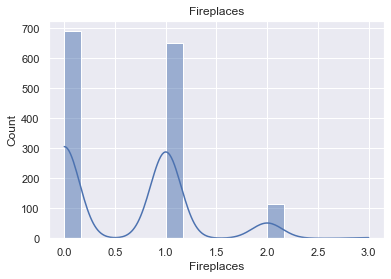

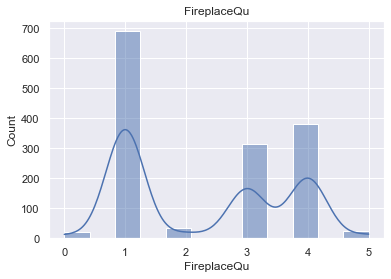

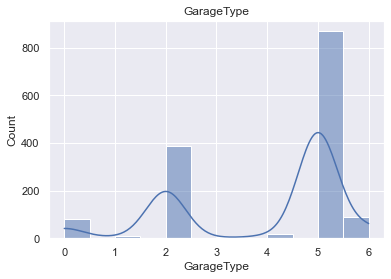

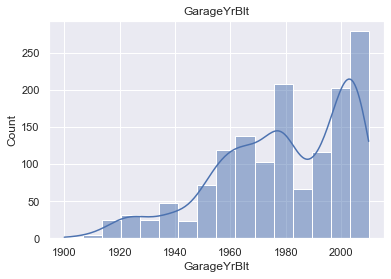

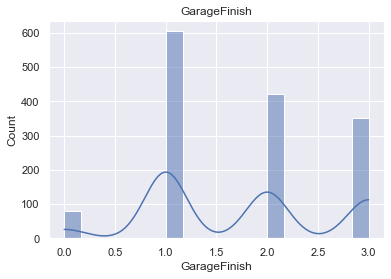

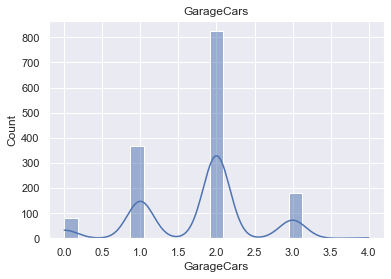

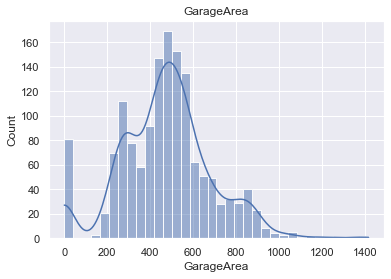

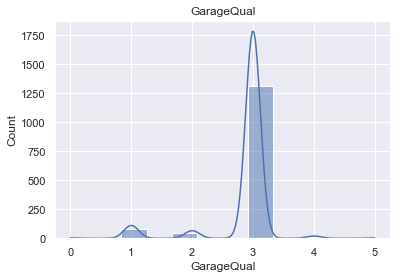

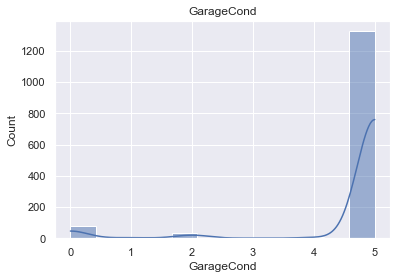

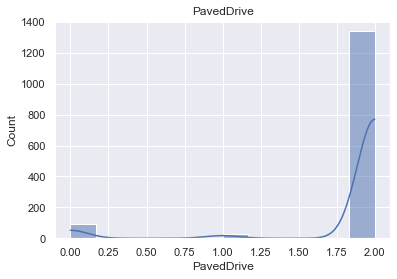

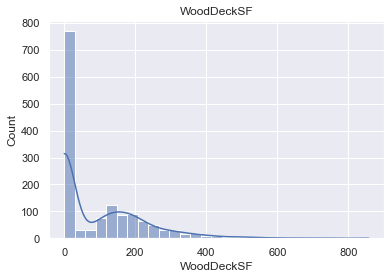

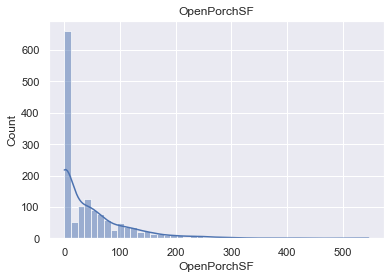

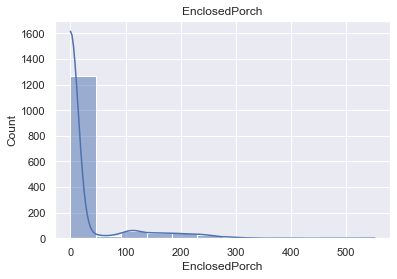

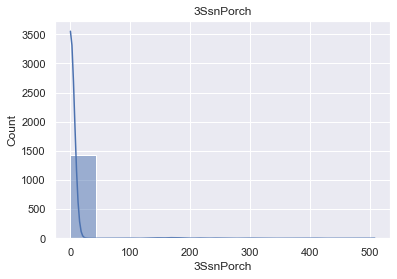

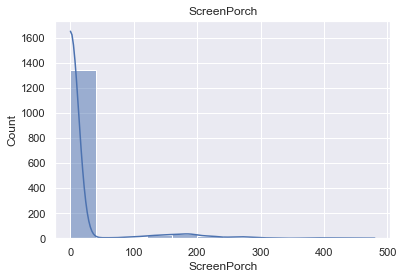

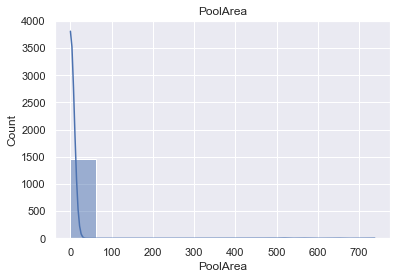

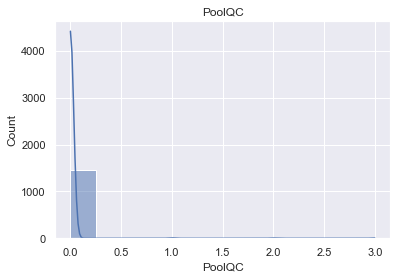

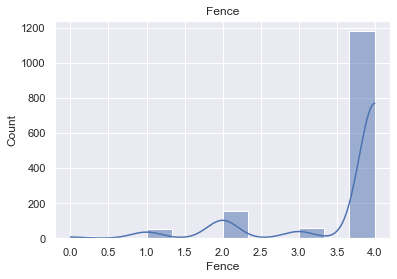

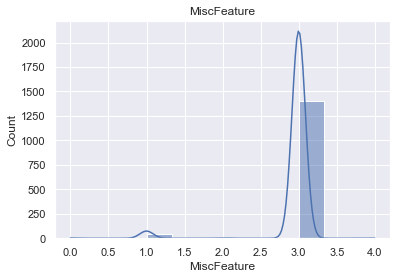

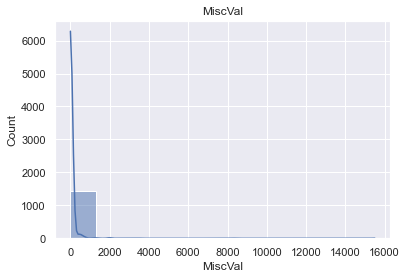

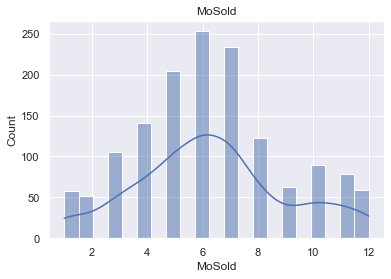

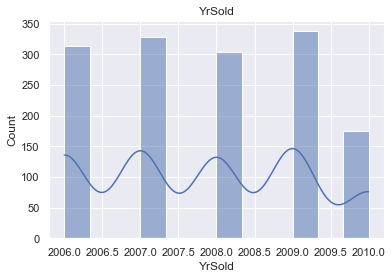

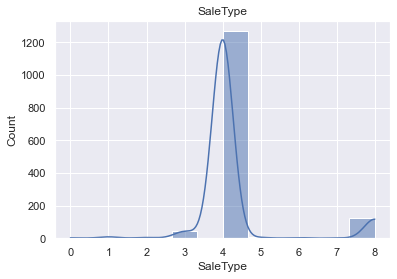

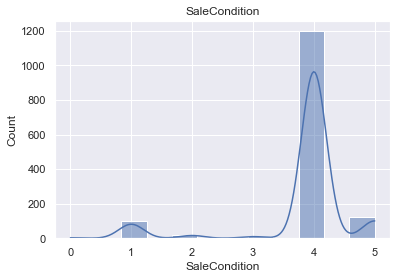

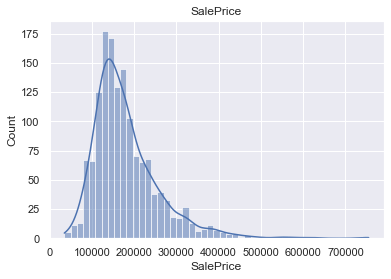

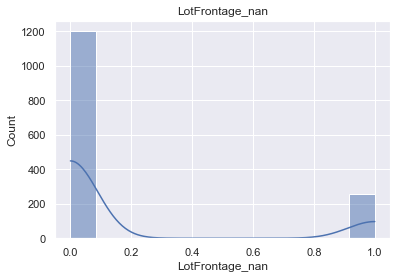

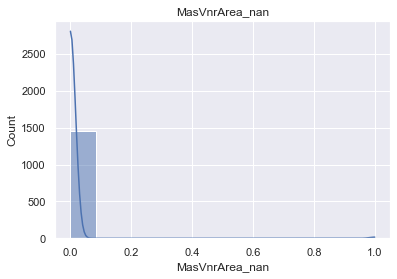

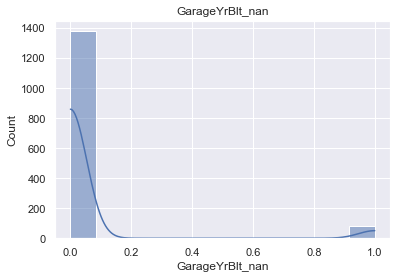

In [49]:
for i in x.columns:
    sns.histplot(x[i], kde = True)
    plt.title(i)
    plt.show()

##### we can see features are skewed we will use Feature Transformation and again check the Distribution

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()

In [52]:
scaled = sc.fit_transform(x)
std_scaler = pd.DataFrame(scaled, columns = x.columns)

In [53]:
std_scaler.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea    Street     Alley  \
0 -1.730865    0.073375  0.359044    -0.220875 -0.207142  0.064238  0.244717   
1 -1.728492   -0.872563  0.359044     0.460320 -0.091886  0.064238  0.244717   
2 -1.726120    0.073375  0.359044    -0.084636  0.073480  0.064238  0.244717   
3 -1.723747    0.309859  0.359044    -0.447940 -0.096897  0.064238  0.244717   
4 -1.721374    0.073375  0.359044     0.641972  0.375148  0.064238  0.244717   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0 -0.657040    -0.111168    0.02618  -0.561478  -0.225716      0.626747   
1 -0.657040    -0.111168    0.02618   0.291548  -0.225716      1.249443   
2  0.872909    -0.111168    0.02618  -0.561478  -0.225716      0.626747   
3  0.872909    -0.111168    0.02618   1.144574  -0.225716      0.782421   
4  0.872909    -0.111168    0.02618   0.291548  -0.225716      1.872139   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0    0.212875    0.051631  0.380115    0.865769     0.651479    -0.517200   
1   -1.779413    0.051631  0.380115    0.150014    -0.071836     2.179628   
2    0.212875    0.051631  0.380115    0.865769     0.651479    -0.517200   
3    0.212875    0.051631  0.380115    0.865769     0.651479    -0.517200   
4    0.212875    0.051631  0.380115    0.865769     1.374795    -0.517200   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   1.050994      0.878668  -0.502859 -0.112482     0.966354     0.935205   
1   0.156734     -0.429577  -0.502859 -0.112482    -1.459620    -1.150283   
2   0.984752      0.830215  -0.502859 -0.112482     0.966354     0.935205   
3  -1.863632     -0.720298  -0.502859 -0.112482    -1.113052    -0.256503   
4   0.951632      0.733308  -0.502859 -0.112482     0.966354     0.935205   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0    0.481584    0.514104   1.052302   0.339798    1.089523  0.618960   
1   -0.634468   -0.570750  -0.689604   0.339798   -0.731199  0.618960   
2    0.481584    0.325915   1.052302   0.339798    1.089523  0.618960   
3   -0.634468   -0.570750  -0.689604   0.339798   -1.338106 -0.655627   
4    0.481584    1.366489   1.052302   0.339798    1.089523  0.618960   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0  0.094944     -0.590555      1.006001    0.575425      0.335924   -0.288653   
1  0.094944      2.220999     -0.136559    1.171992      0.335924   -0.288653   
2  0.094944      0.346630      1.006001    0.092907      0.335924   -0.288653   
3  2.405256     -0.590555     -0.136559   -0.499274      0.335924   -0.288653   
4  0.094944      1.283814      1.006001    0.463568      0.335924   -0.288653   

   BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  Electrical  \
0  -0.944591    -0.459303  0.125272   0.891179    0.263813    0.297699   
1  -0.641228     0.466465  0.125272   0.891179    0.263813    0.297699   
2  -0.301643    -0.313369  0.125272   0.891179    0.263813    0.297699   
3  -0.061670    -0.687324  0.125272  -0.151386    0.263813    0.297699   
4  -0.174865     0.199680  0.125272   0.891179    0.263813    0.297699   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.793434  1.161852     -0.120242   0.370333      1.107810     -0.241061   
1  0.257140 -0.795163     -0.120242  -0.482512     -0.819964      3.948809   
2 -0.627826  1.189351     -0.120242   0.515013      1.107810     -0.241061   
3 -0.521734  0.937276     -0.120242   0.383659      1.107810     -0.241061   
4 -0.045611  1.617877     -0.120242   1.299326      1.107810     -0.241061   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.789741  1.227585      0.163779     -0.211454     0.735994      0.912210   
1  0.789741 -0.761621      0.163779     -0.211454    -0.771091     -0.318683   
2  0.789741  1.227585      0.163779     -0.211454     0.735994     -0.3

In [54]:
std_scaler.drop('Id', axis=1, inplace = True)

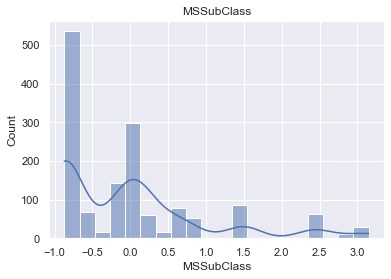

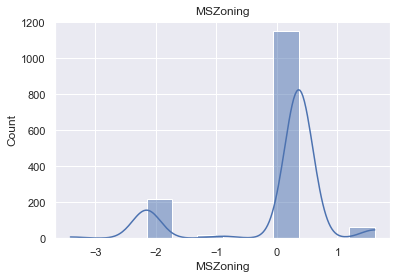

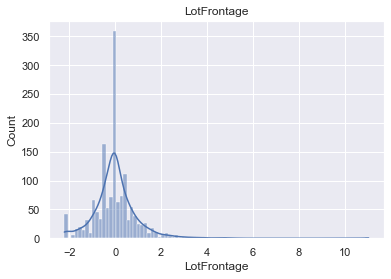

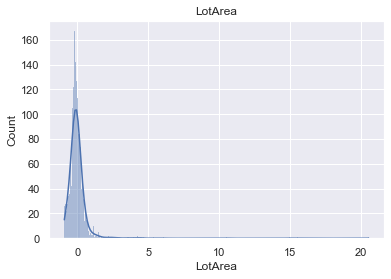

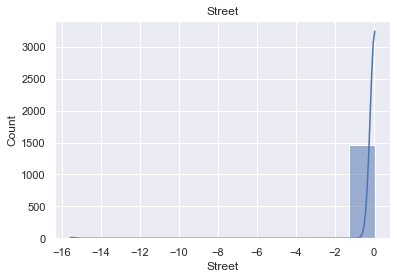

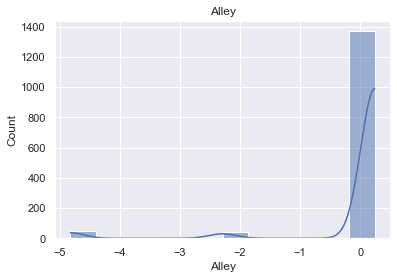

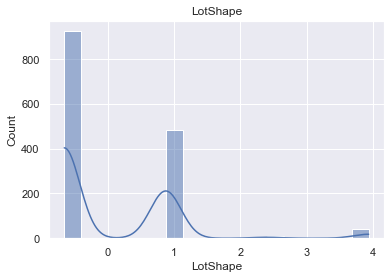

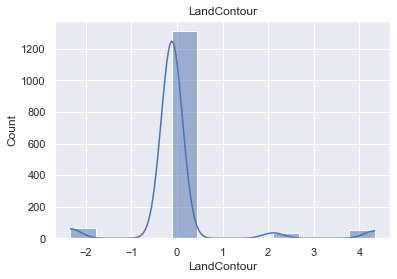

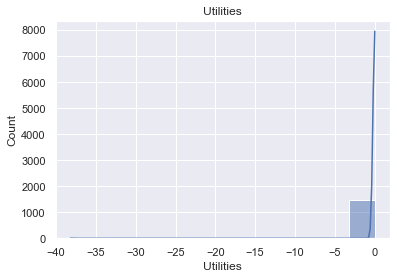

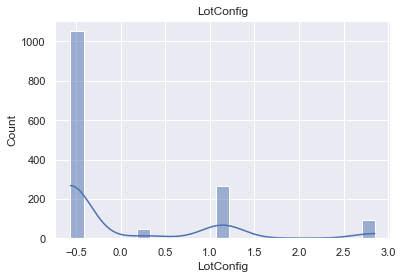

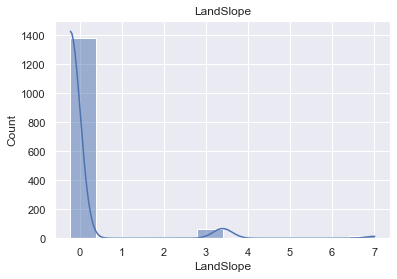

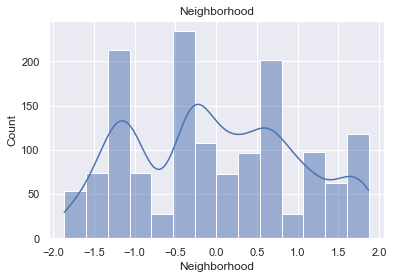

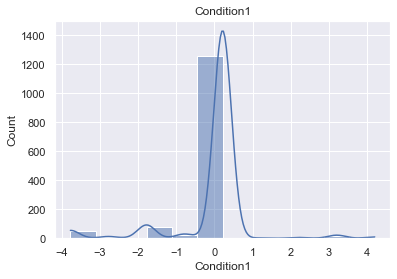

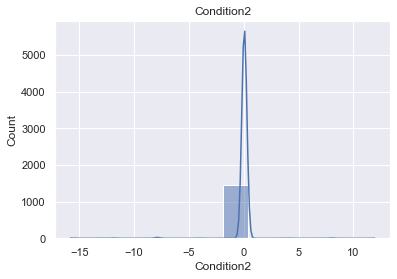

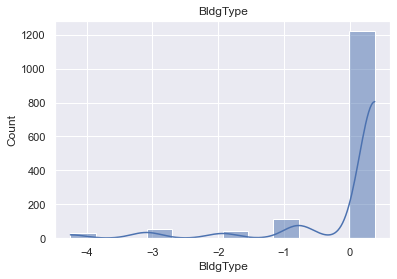

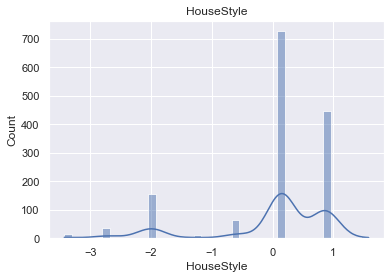

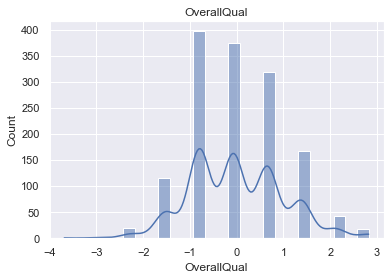

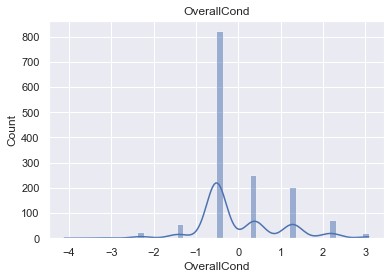

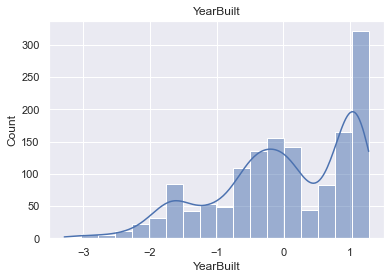

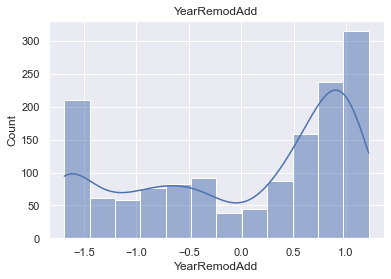

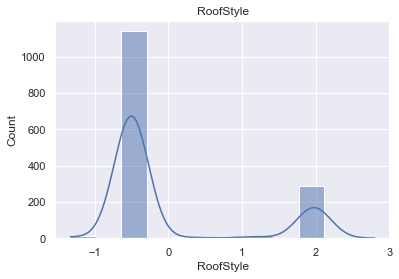

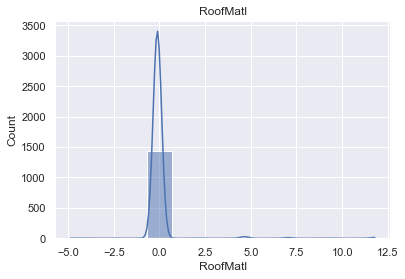

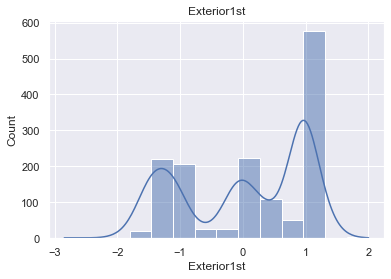

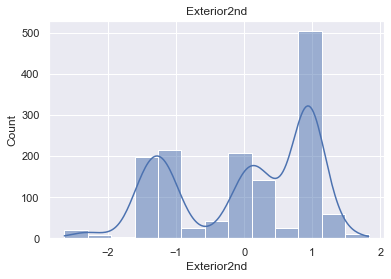

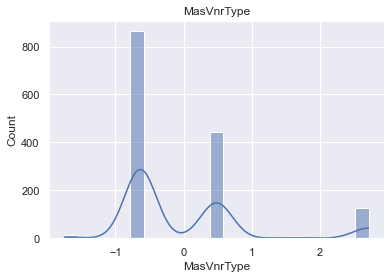

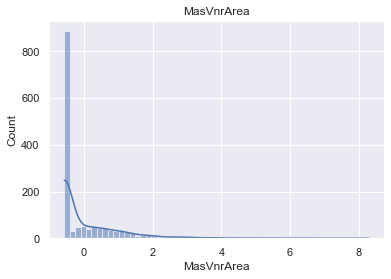

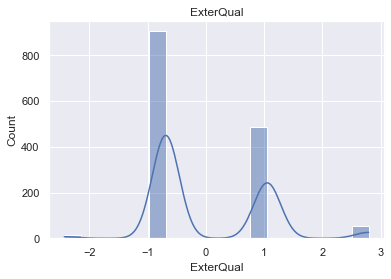

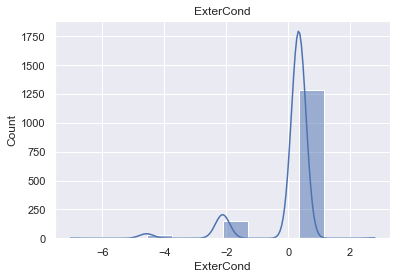

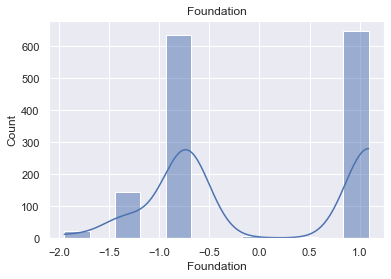

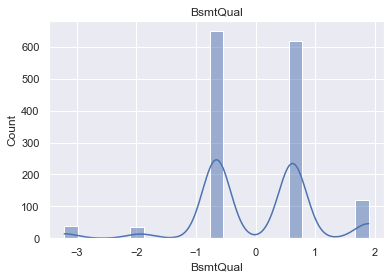

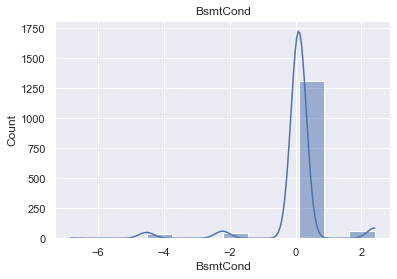

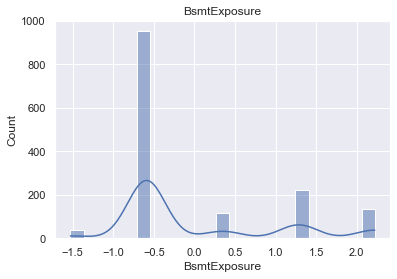

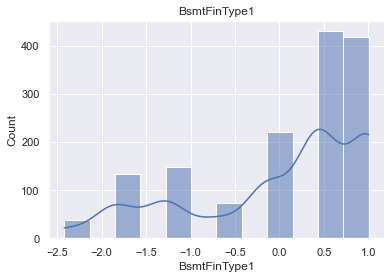

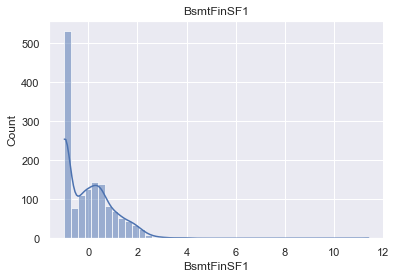

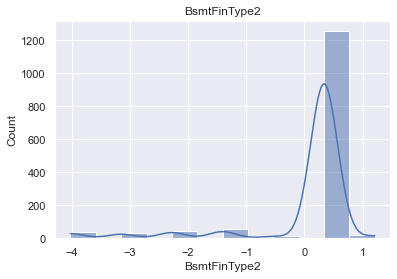

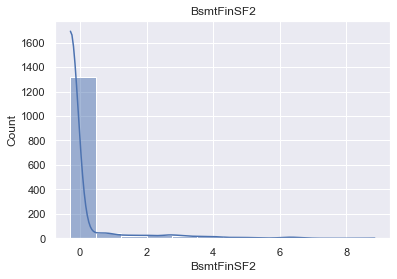

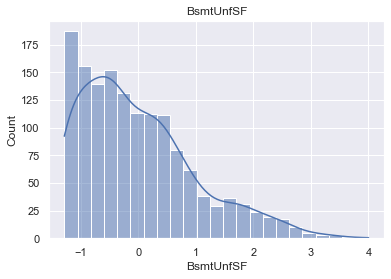

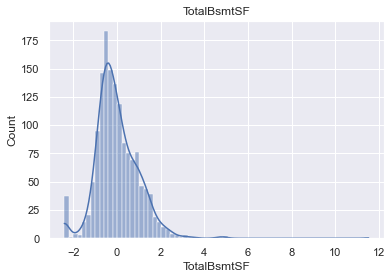

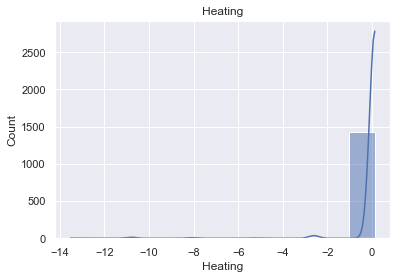

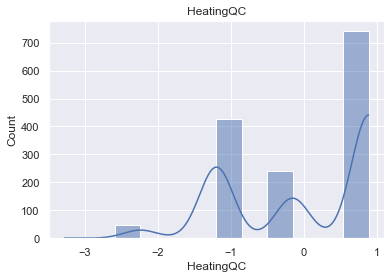

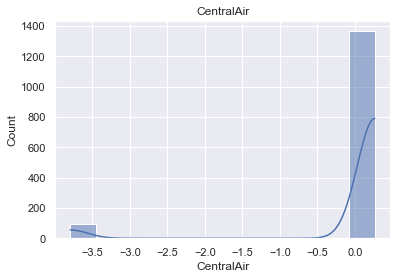

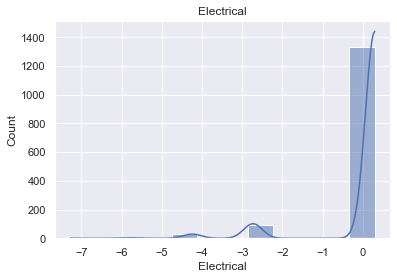

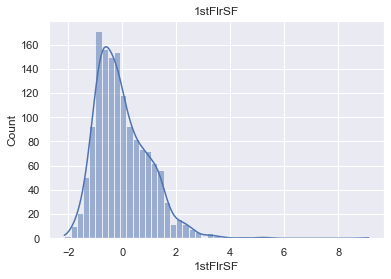

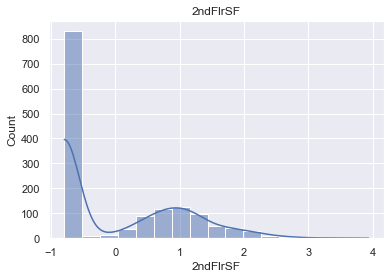

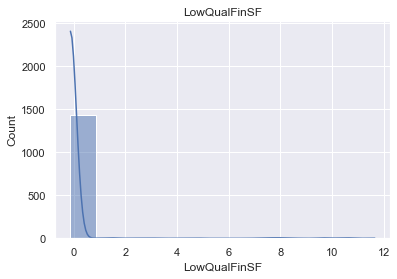

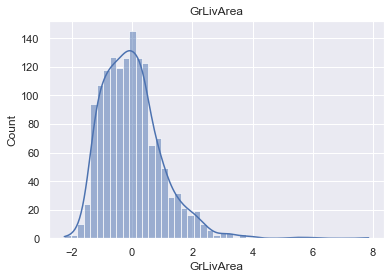

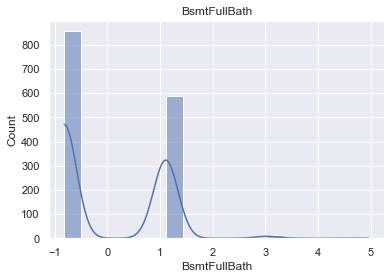

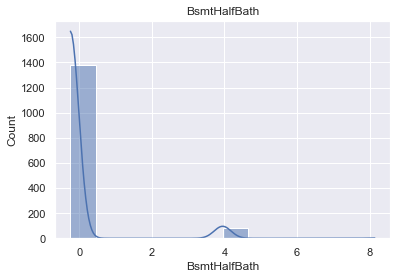

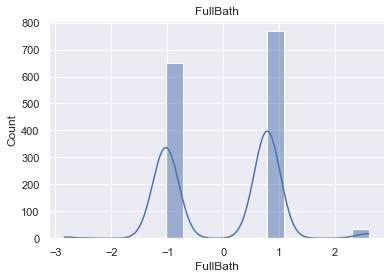

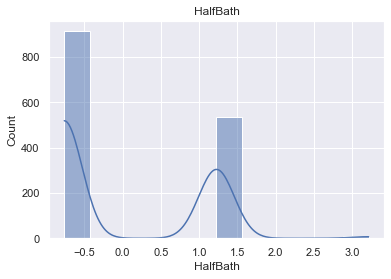

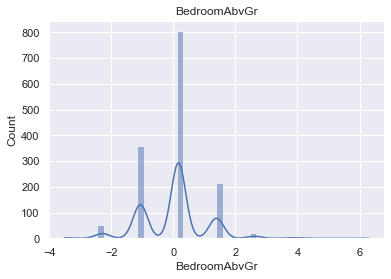

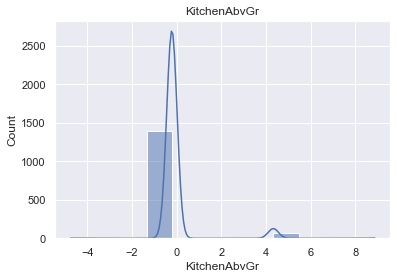

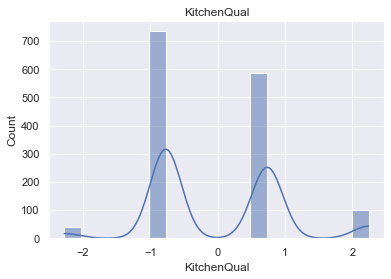

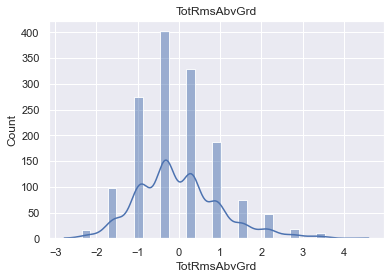

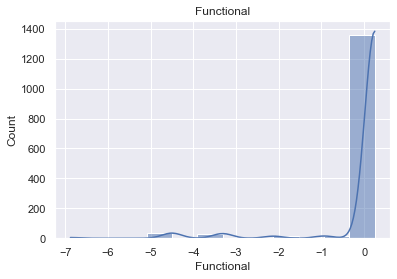

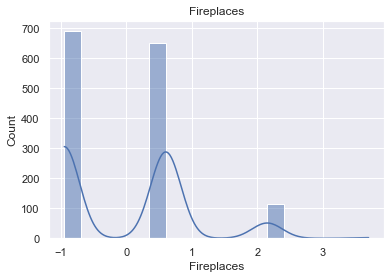

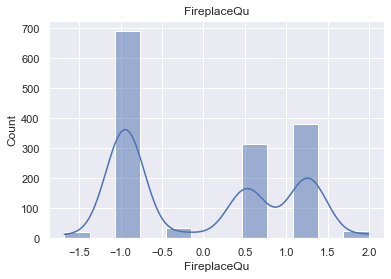

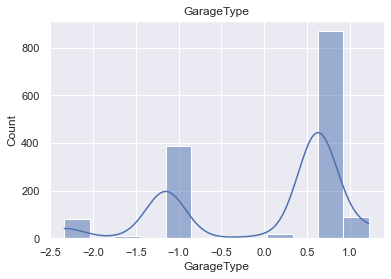

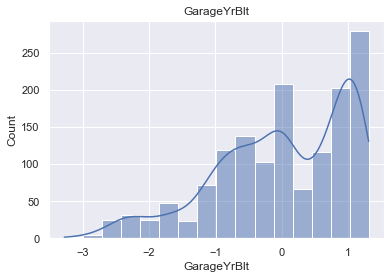

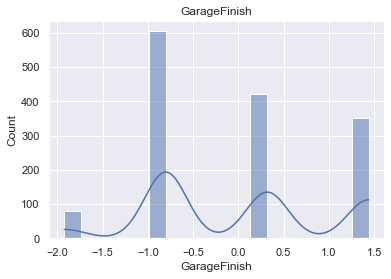

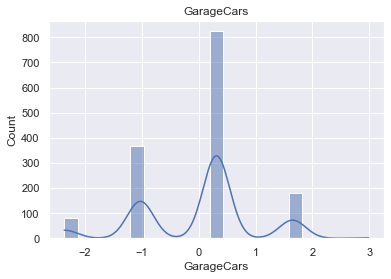

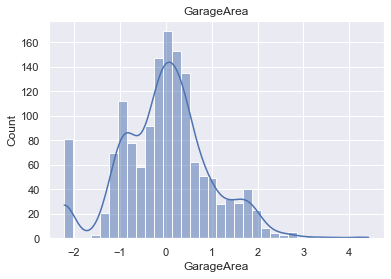

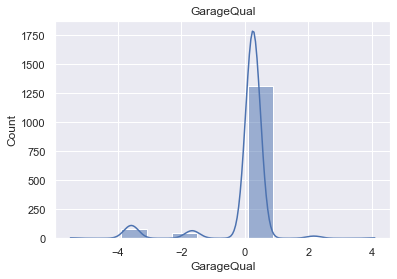

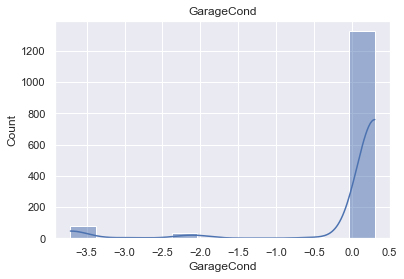

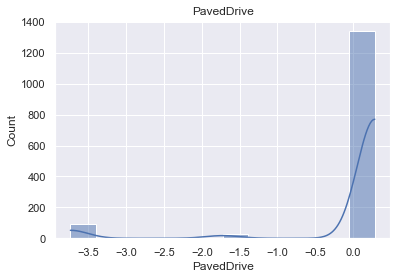

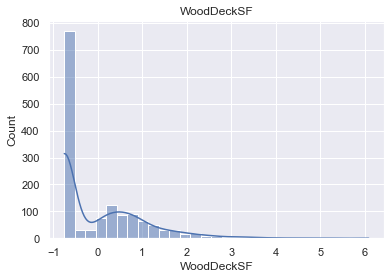

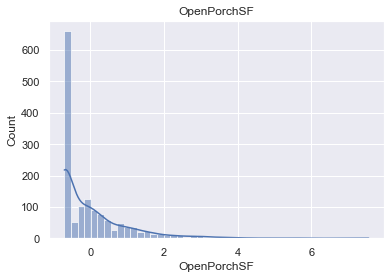

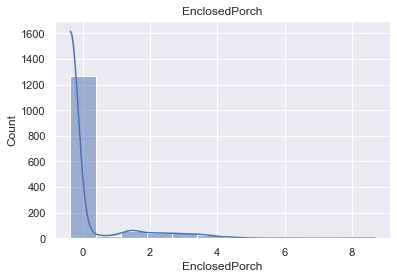

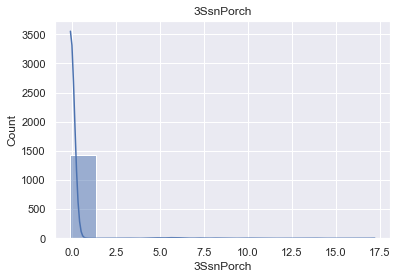

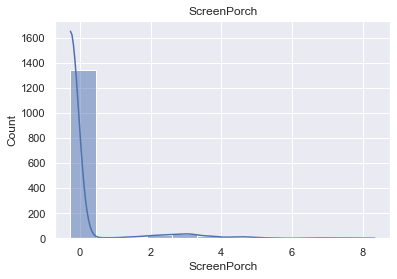

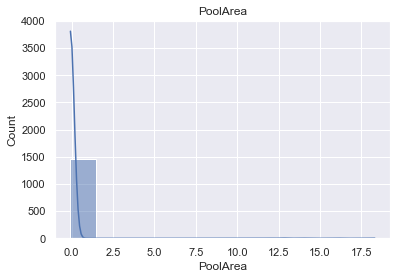

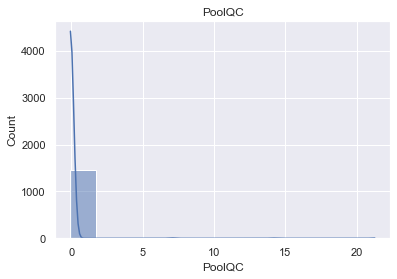

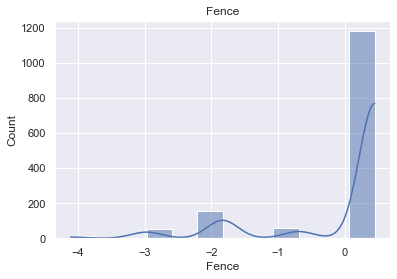

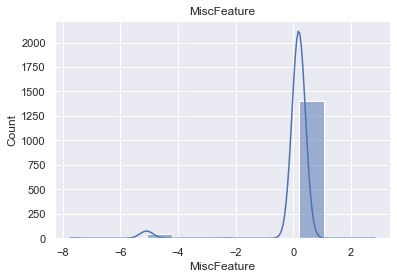

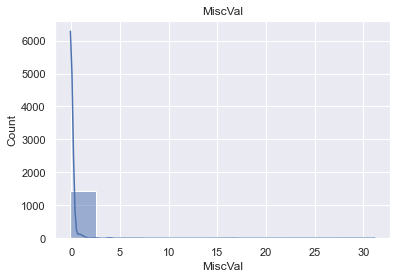

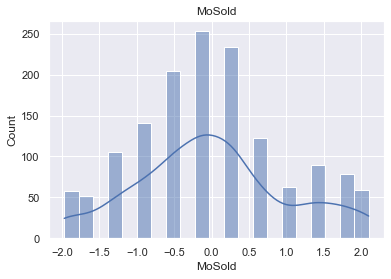

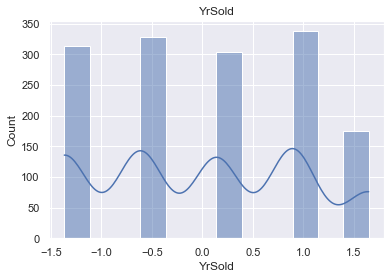

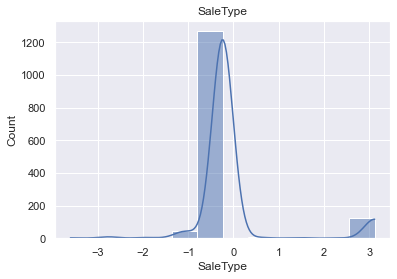

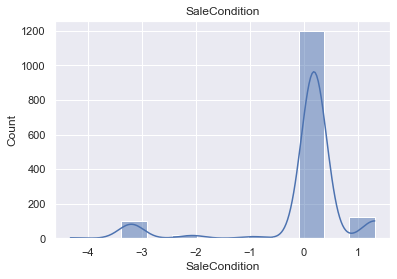

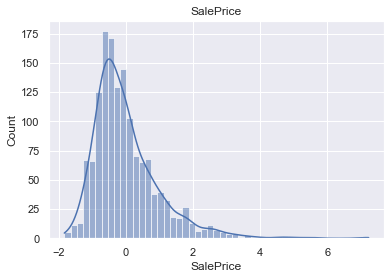

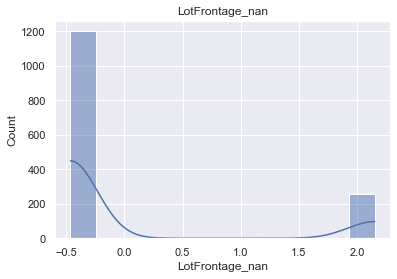

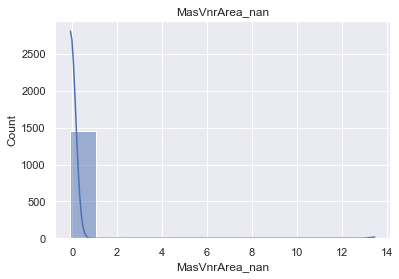

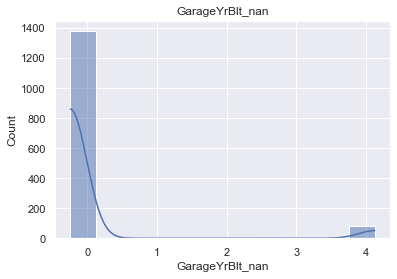

In [55]:
for i in std_scaler.columns:
    sns.histplot(std_scaler[i], kde = True)
    plt.title(i)
    plt.show()

#### We will try with log1p Transformation

In [56]:
log_transformed = np.log1p(x)

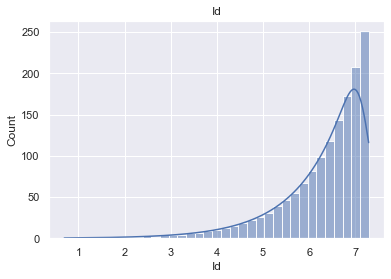

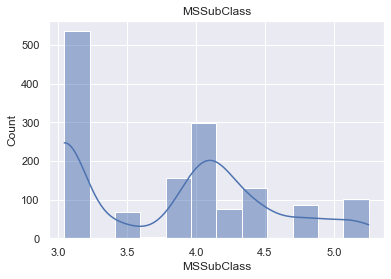

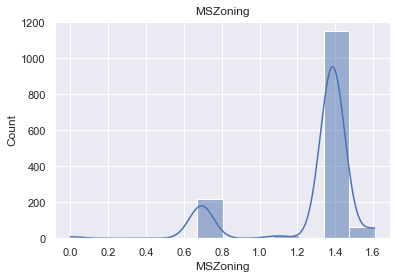

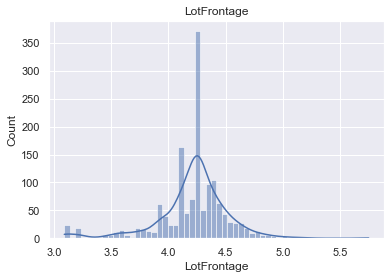

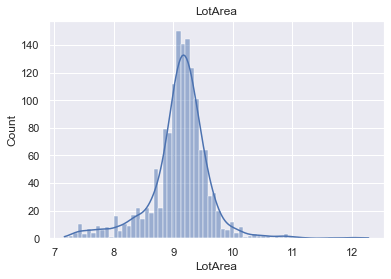

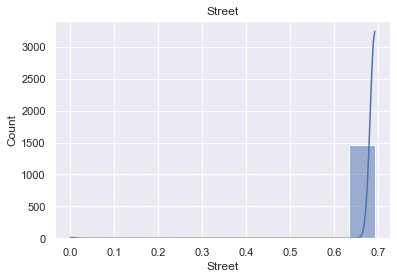

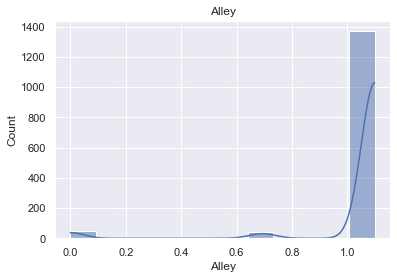

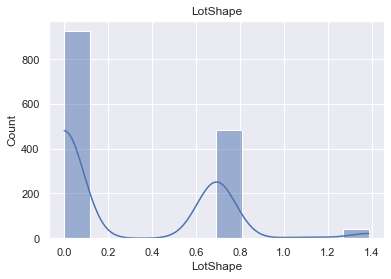

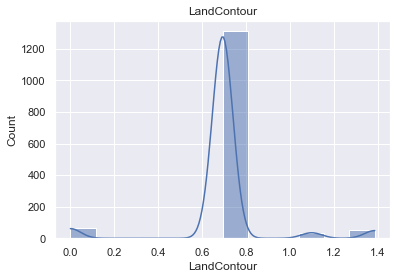

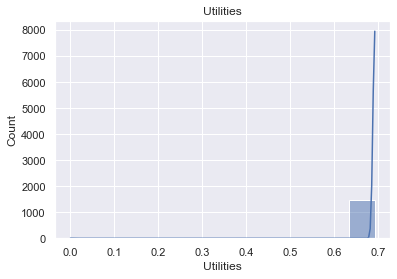

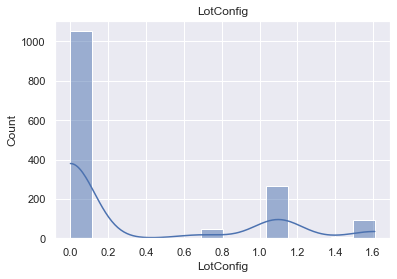

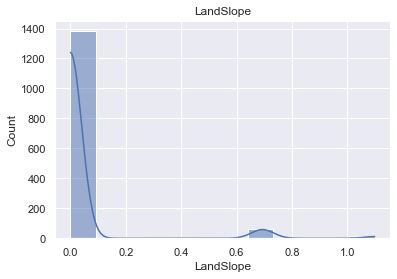

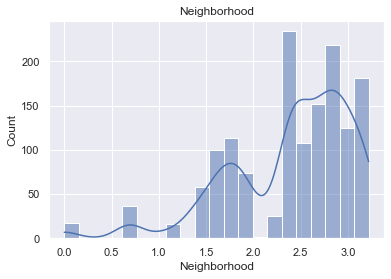

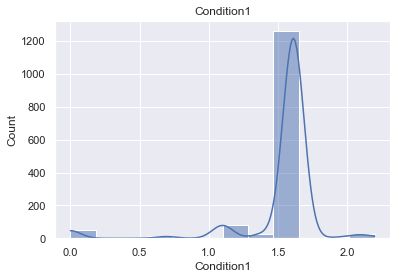

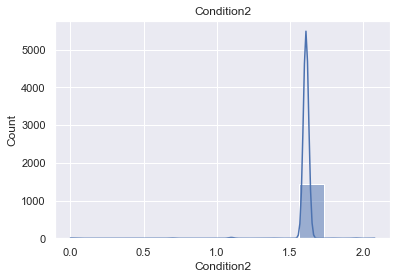

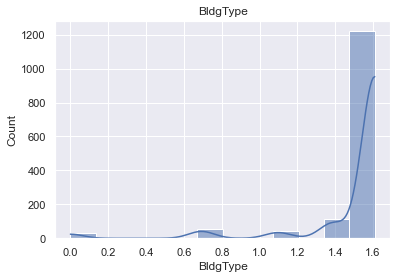

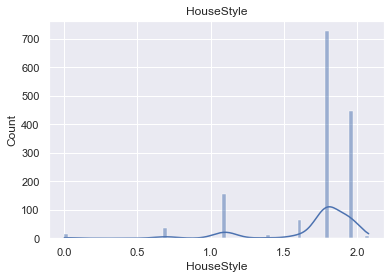

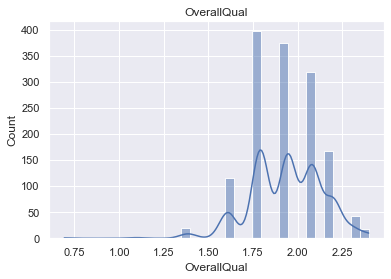

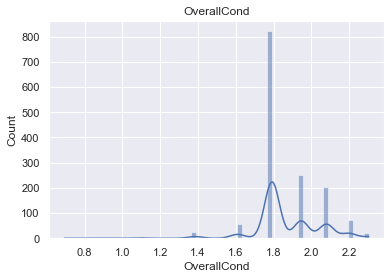

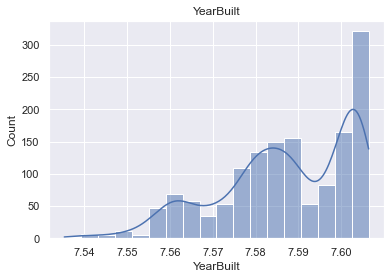

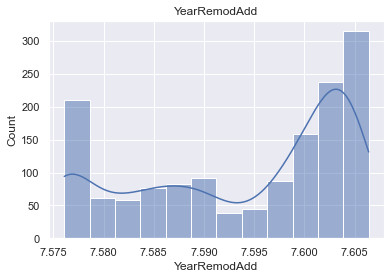

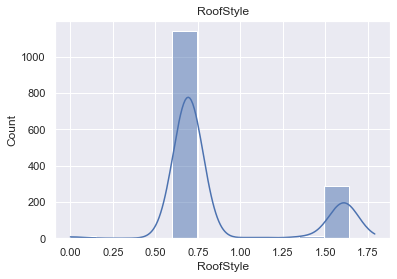

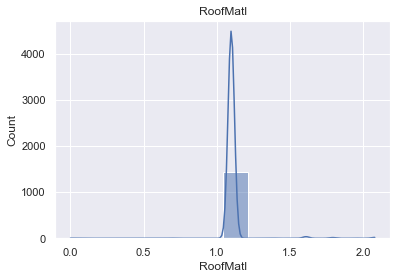

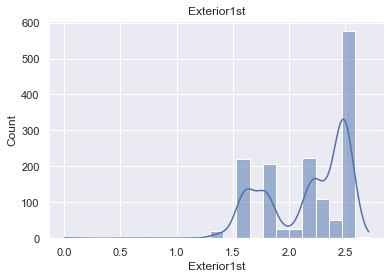

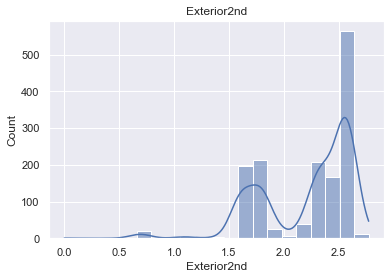

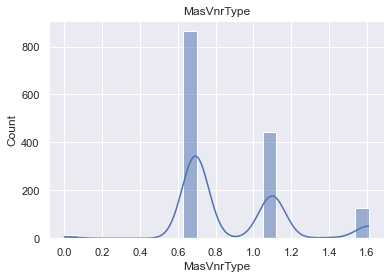

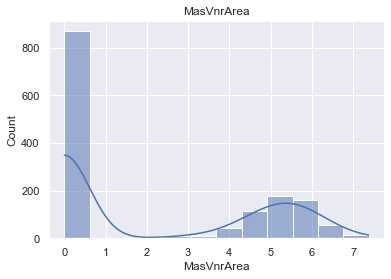

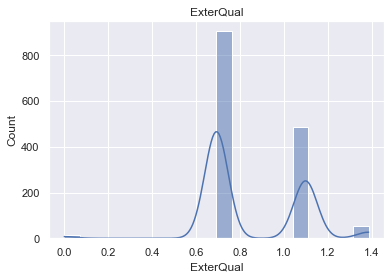

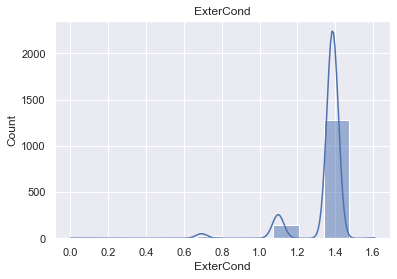

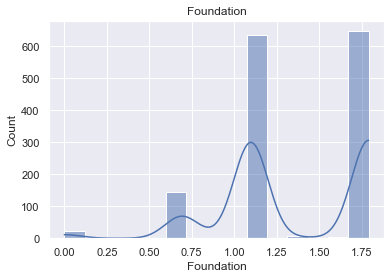

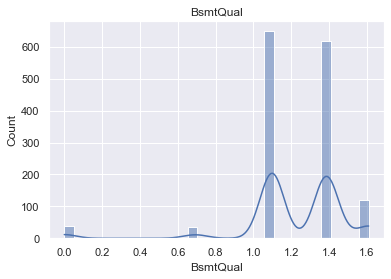

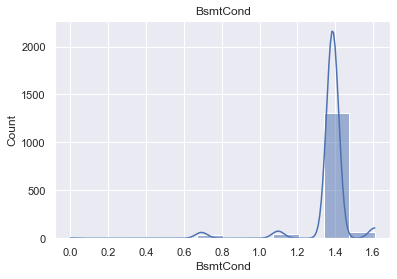

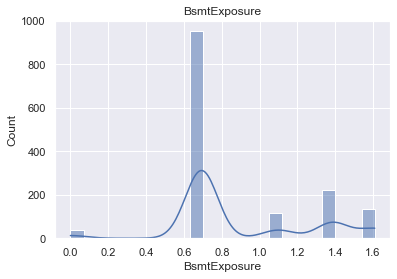

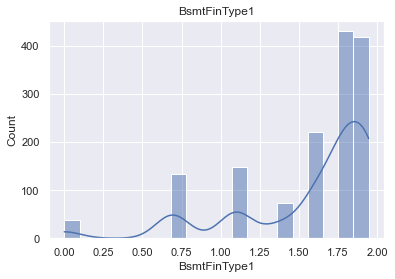

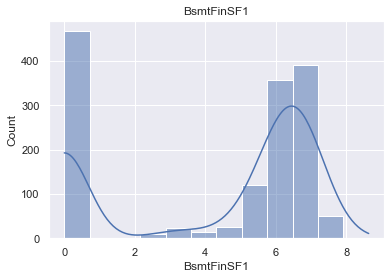

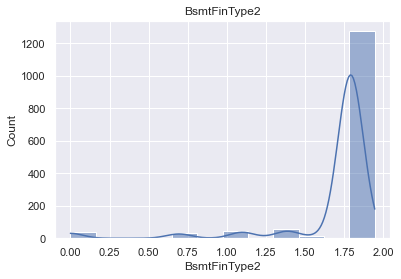

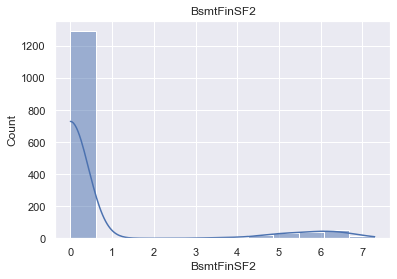

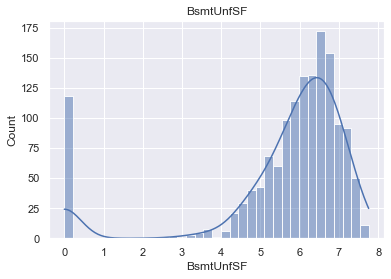

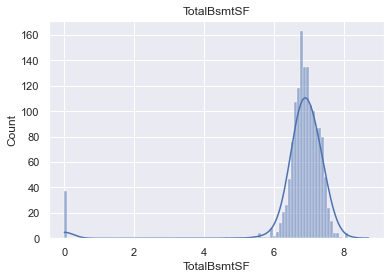

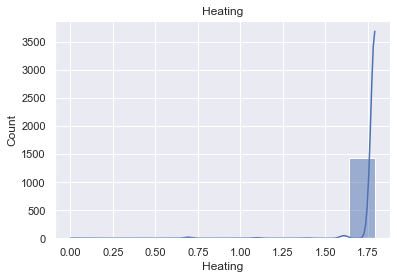

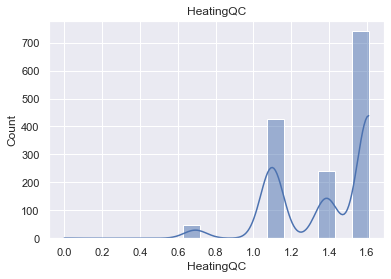

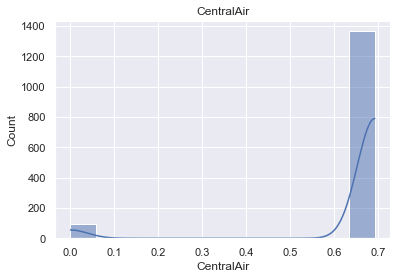

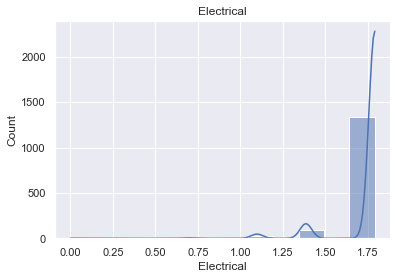

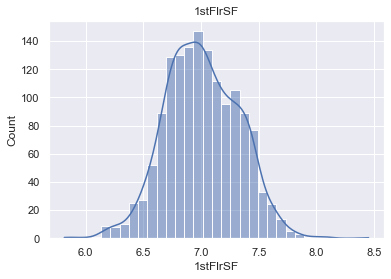

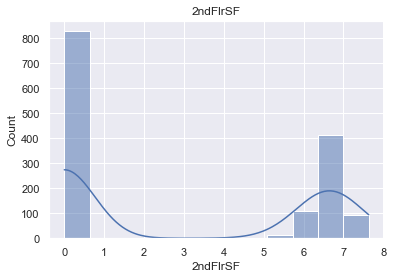

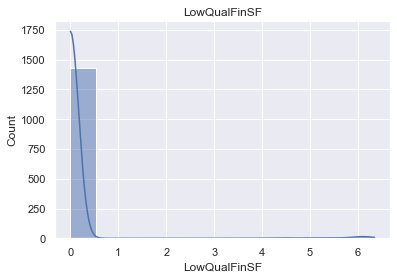

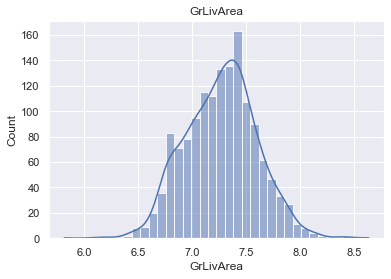

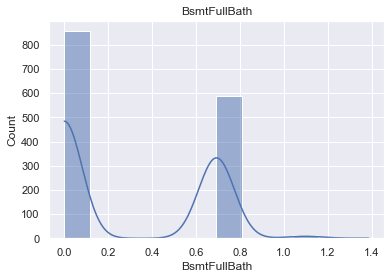

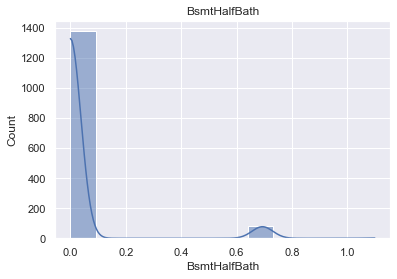

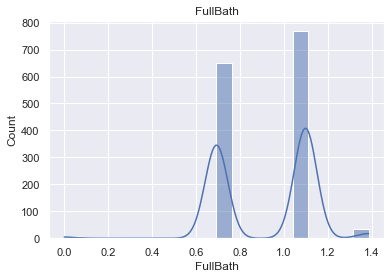

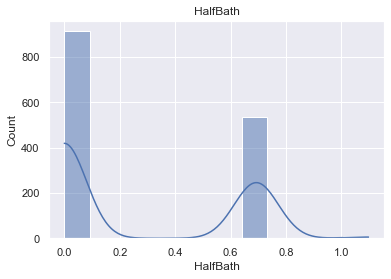

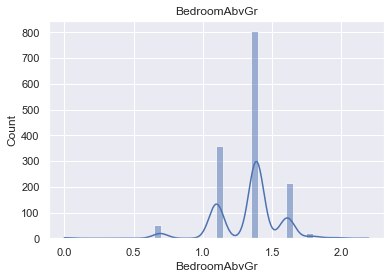

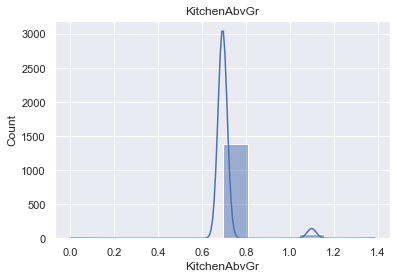

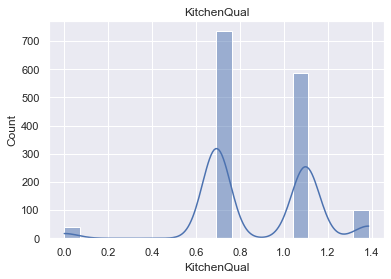

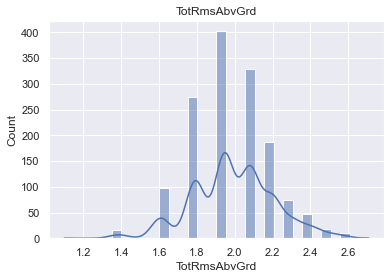

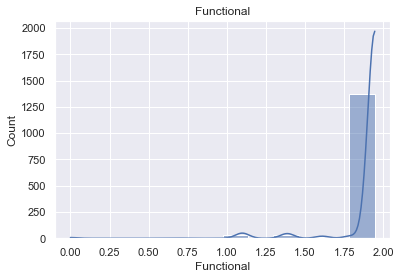

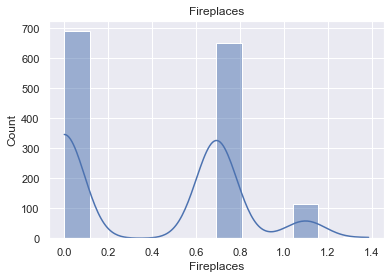

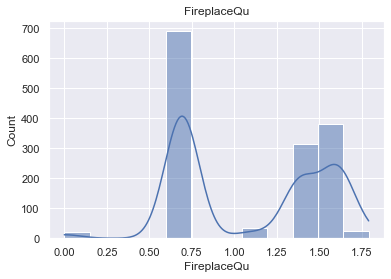

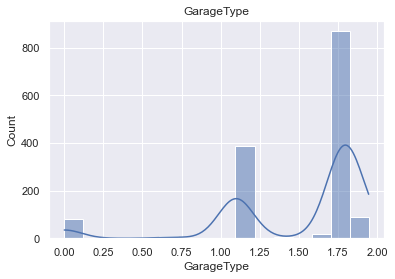

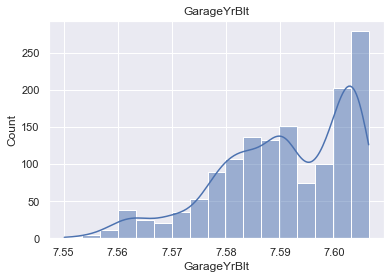

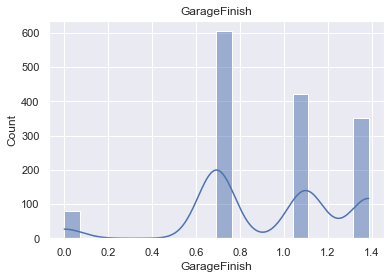

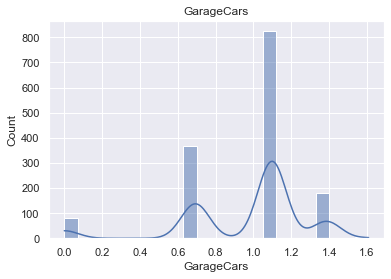

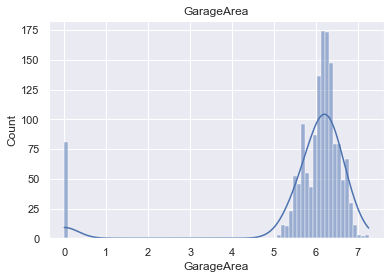

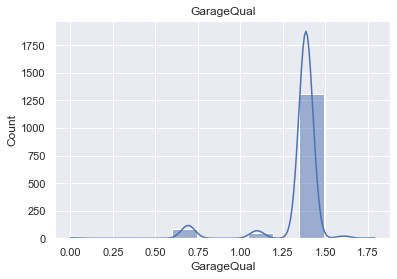

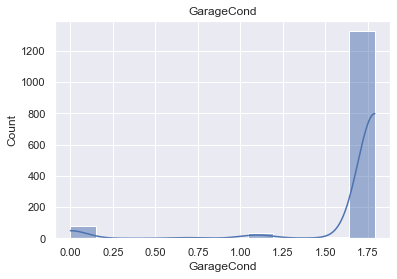

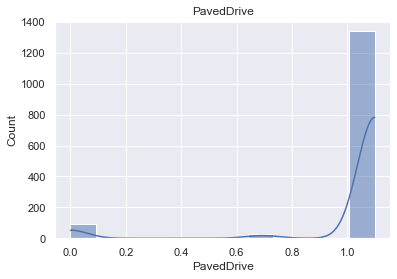

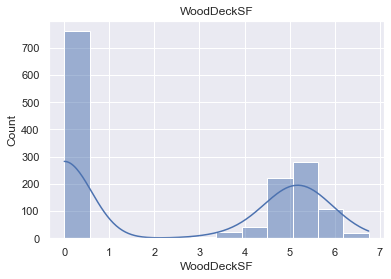

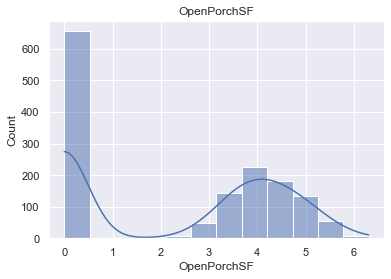

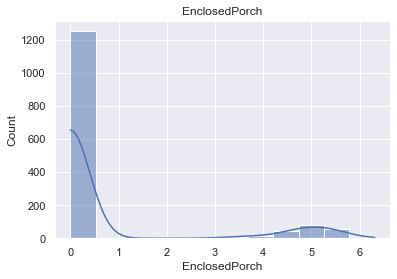

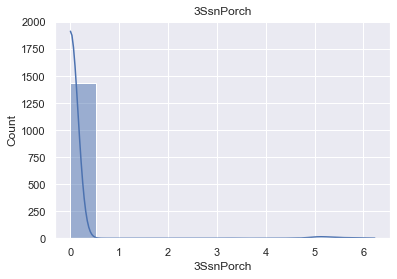

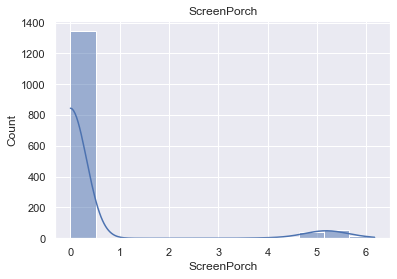

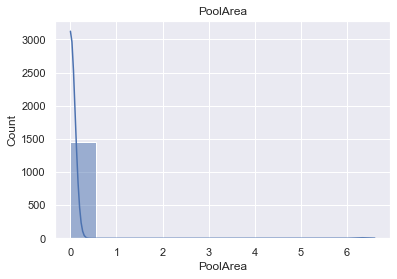

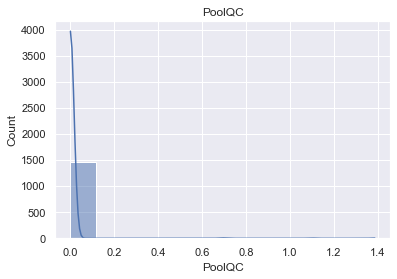

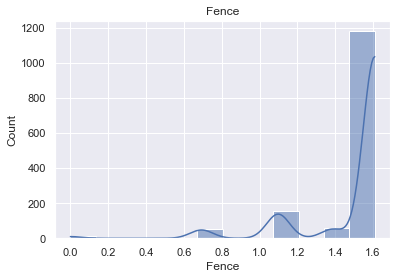

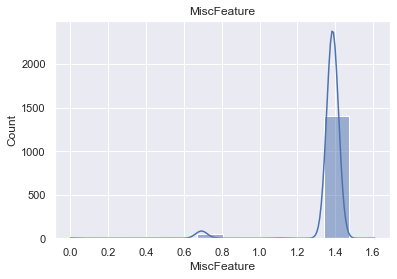

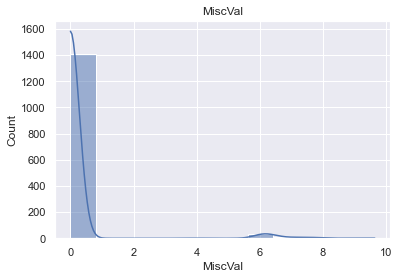

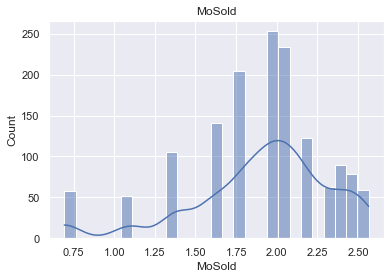

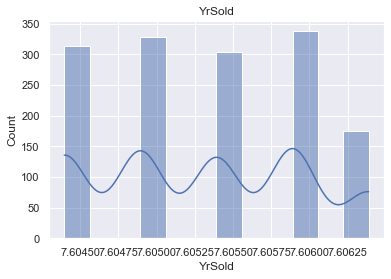

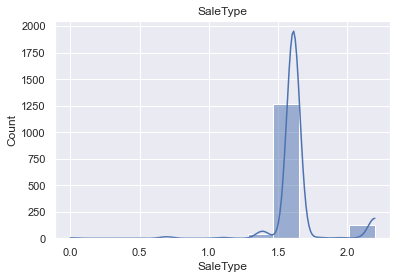

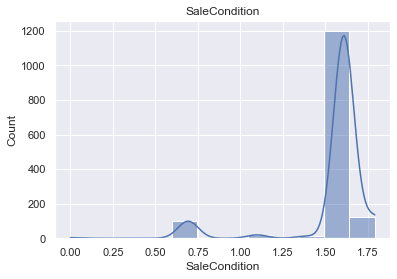

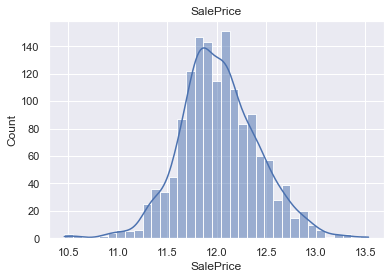

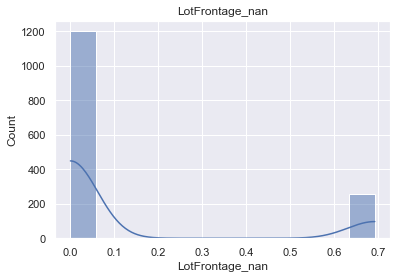

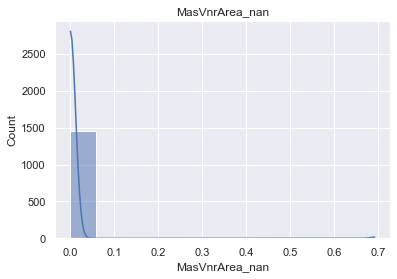

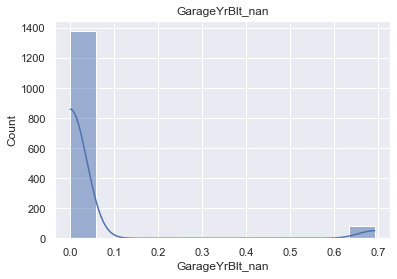

In [57]:
for i in log_transformed.columns:
    sns.histplot(log_transformed[i], kde = True)
    plt.title(i)
    plt.show()

In [59]:
log_test = np.log1p(test)

##### I have checked with Log transformed, MInmax and Standard Scaler, Log Transformed data is giving better result than others

In [61]:
log_transformed.to_csv('log_transformed.csv', index=False)
log_test.to_csv('log_test.csv', index = False)